In [1]:
# データ読み込み
import pandas as pd
train_org = pd.read_csv('./data/train.csv')
test_org = pd.read_csv('./data/test.csv')
df = pd.concat([train_org, test_org])
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


データの説明<br>

|変数|定義|カテゴリ|
|:--|:--|:--|
|Survival|生存したかどうか|0 = 死亡, 1 = 生存|
|Pclass|チケットの階級|1 = 1st(上流), 2 = 2nd(中流), 3 = 3rd(下流)|
|Sex|性別||
|Age|年齢|予測された年齢の場合、小数点を含む表示になっている| 	
|Sibsp|タイタニックに乗船している兄弟、配偶者の数|兄弟 = 兄弟、前配偶者の兄弟<br>配偶者 = 夫と妻（愛人や婚約者は除く）|
|Parch|タイタニックに乗船している親、子の数|親 = 父母<br>子 = 息子、娘、前配偶者の息子、娘<br>※子供の中には乳母と旅行しているものもおり、その親の数は0になっている|
|Ticket|チケット番号||
|Fare|料金|| 	
|Cabin|客室番号||	
|Embarked|乗船した港|C = Cherbourg, Q = Queenstown, S = Southampton|

In [2]:
# 行列数を確認
df.shape

(1309, 12)

In [3]:
# 項目名、型、欠損値の有無等を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
# 欠損値をカウント
print('Age: %d' % df.Age.isnull().sum())
print('Cabin: %d' % df.Cabin.isnull().sum())
print('Embarked: %d' % df.Embarked.isnull().sum())
print('Fare: %d' % df.Fare.isnull().sum())

Age: 263
Cabin: 1014
Embarked: 2
Fare: 1


In [5]:
# 数値データの基本統計量算出
df.iloc[:, [0, 3, 5, 9]].describe()

,Age,Fare,Parch,SibSp
count,1046.000000,1308.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,0.498854
std,14.413493,51.758668,0.865560,1.041658
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,39.000000,31.275000,0.000000,1.000000
max,80.000000,512.329200,9.000000,8.000000


In [6]:
# カテゴリデータの分布を確認
import seaborn as sns
import matplotlib.pyplot as plt

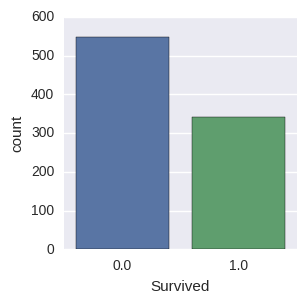

In [7]:
# 生存
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(x='Survived', data=df.iloc[0:891, [6, 10]])
plt.show()

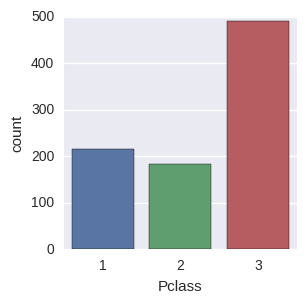

In [8]:
# チケットのクラス
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(x='Pclass', data=df.iloc[0:891, [6, 7]])
plt.show()

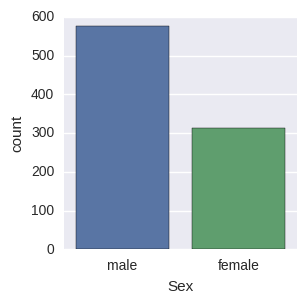

In [9]:
# 性別
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(x='Sex', data=df.iloc[0:891, [6, 8]])
plt.show()

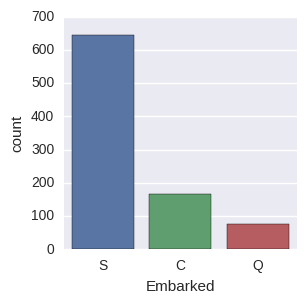

In [10]:
# 乗船地
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(x='Embarked', data=df.iloc[0:891, [6, 2]])
plt.show()

In [11]:
# 肩書きの分布を確認
import re

def get_title(name):
    # ex. Braund, Mr. Owen Harris
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

pd.value_counts(df.Name.apply(get_title))

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Don           1
Capt          1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Dona          1
Mme           1
Name: Name, dtype: int64

In [12]:
# 苗字の分布を確認
# ex. Braund, Mr. Owen Harris
pd.value_counts(df.Name.apply(lambda x: x.split(',')[0]))

Sage          11
Andersson     11
Goodwin        8
Asplund        8
Davies         7
Johnson        6
Fortune        6
Smith          6
Panula         6
Brown          6
Ford           6
Skoog          6
Rice           6
Carter         6
Thomas         5
Ryerson        5
Lefebre        5
Palsson        5
Williams       5
Kelly          5
Dean           4
Baclini        4
Ware           4
Cacic          4
Herman         4
Hansen         4
Hocking        4
Allison        4
Johnston       4
Gustafsson     4
              ..
Butt           1
Parr           1
Riordan        1
Olsvigen       1
Dahlberg       1
Candee         1
Hogeboom       1
Colbert        1
Turja          1
Sdycoff        1
Lievens        1
Ivanoff        1
Myles          1
Ridsdale       1
Smart          1
Somerton       1
Hawksford      1
Hee            1
Tikkanen       1
Petterson      1
Guest          1
Vendel         1
Sagesser       1
Julian         1
Bengtsson      1
Harknett       1
Berglund       1
Cairns        

### トレーニング用にデータを設計

In [13]:
## 操作前にオリジナルを保持
df_org = df.copy()

In [14]:
## 欠損値を補完
# 乗船値の欠損値を補完
df.Embarked = df.Embarked.fillna('U')
# 料金の欠損値を補完
df.Fare = df.Fare.fillna(df.Fare.median())
# 客室の欠損値を補完
df.Cabin = df.Cabin.fillna('U')

In [15]:
## 特徴エンジニアリング
import math
import string
import numpy as np

In [16]:
# 肩書を作成
df['Title'] = df.Name.apply(get_title)

# 珍しいものは"rare_title"に変換、男女の肩書は一般的なものに統一
def create_title(title, rare_titles):
    if title in rare_titles:
        return "rare_title"
    elif title in ['Mlle', 'Ms']:
        return "Miss"
    elif title == 'Mme':
        return "Mrs"
    else:
        return title

rare_title_list = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
df['Title'] = df.Title.map(lambda x: create_title(x, rare_title_list))

In [17]:
# 家族の人数
df['FamilySize'] = df.SibSp + df.Parch + 1

In [18]:
# 家族の人数カテゴリ化
#df.loc[df['FamilySize'] == 1, 'FamilySizeCategory'] = 'singleton'
#df.loc[(df['FamilySize'] > 1) & (df['FamilySize'] <= 4), 'FamilySizeCategory'] = 'small'
#df.loc[df['FamilySize'] > 4, 'FamilySizeCategory'] = 'large'

In [19]:
# 家族毎のフラグ
# 苗字
df['LastName'] = df.Name.apply(lambda x: x.split(',')[0])
# 苗字はかぶるので、FamilySize と組み合わせて区別する
df['FamilyID'] = df.apply(lambda x: x.LastName + str(x.FamilySize), axis=1)

In [20]:
# 母フラグ
df['Mother'] = df.apply(lambda x: 1 if x.Sex == 'female' and x.Title == 'Mrs' and x.Parch >= 1 else 0, axis=1)

In [21]:
# 自分以外の家族が生存している割合を表示
df_family_status = pd.concat(
    [df_org.Survived, df.FamilyID], axis=1
).dropna(subset=['Survived']).groupby('FamilyID')['Survived'].agg(['sum', 'count'])

def get_family_status(familyid, survived, status):
    if not np.isnan(survived):
        if familyid in status.index:
            if status.ix[familyid, 1] == 1:
                return 0
            else:
                return (status.ix[familyid, 0] - survived) / (status.ix[familyid, 1] - 1)
        else:
            return 0
    else:
        if familyid in status.index:
            return (status.ix[familyid, 0]) / (status.ix[familyid, 1])
        else:
            return 0

df['FamilyStatus'] = df.apply(
    lambda x: get_family_status(x.FamilyID, x.Survived, df_family_status), axis=1
)

In [22]:
# 名前の長さ
df['NameLength'] = df.Name.map(lambda x: len(x))

In [23]:
# キャビンからデッキの位置を取得
df['Deck'] = df.Cabin.map(lambda x: x[0])
# 数が少ないものをその他にする
majority_deck = df.dropna(subset=['Survived']).Deck.value_counts()[df.dropna(subset=['Survived']).Deck.value_counts() > 25].index
df['Deck'] = df.Deck.map(lambda x: x if x in majority_deck.values else 'other')

In [24]:
# 客室が右舷か左舷か チケット番号の末尾が奇数なら右舷らしい
def check_re(string, ptn):
    match = ptn.search(string)
    if match is None:
        return 'left'
    else:
        return 'right'
    
ptn = re.compile('[13579]\Z')
df['RightLeft'] = df.Ticket.map(lambda x: check_re(x, ptn))

In [25]:
# チケットの名前の長さ
df['TicketNameLength'] = df.Ticket.map(lambda x: len(x))

In [26]:
# チケットの頭の英字＋数字
def extract_ticket_prefix(ticket):
    t = ticket.replace('/', '').replace('.', '').split()[0]
    if t.isdigit():
        return 'StartWithNumber'
    else:
        return t
    
df['TicketPrefix'] = df.Ticket.map(lambda x: extract_ticket_prefix(x))

# 数が多いもののみ残して残りはその他にする
majority_prefix = df.dropna(subset=['Survived'])['TicketPrefix'].value_counts()[
    df.dropna(subset=['Survived'])['TicketPrefix'].value_counts() > 15
].index

df['TicketPrefix'] = df.TicketPrefix.map(lambda x: x if x in majority_prefix.values else 'other')

In [27]:
# 年齢が欠損しているフラグを作成
df['AgeNull'] = df.Age.map(lambda x: 1 if np.isnan(x) else 0)

In [28]:
# 特徴量でグループ化し、年齢の中央値を計算し、元のデータフレームに結合
age_median = df.groupby(['Sex', 'Title', 'Pclass', 'Embarked', 'Deck']).median()[['Age']]
age_median_2 = df.groupby(['Sex', 'Title', 'Pclass', 'Embarked']).median()[['Age']]
df = pd.merge(df, age_median, left_on=['Sex', 'Title', 'Pclass', 'Embarked', 'Deck'], right_index=True, how='left', sort=False)
df = pd.merge(df, age_median_2, left_on=['Sex', 'Title', 'Pclass', 'Embarked'], right_index=True, how='left', sort=False)
df['Age_y'] = df.apply(lambda x: x.Age if np.isnan(x.Age_y) else x.Age_y, axis=1)

# 年齢がNaNではない行で、中央値で当てはめた場合の二乗誤差を計算
df_tmp = df.dropna(subset=['Age_x'])
print('error of mean square: %.5f' % (np.sum(np.sqrt((df_tmp.Age_x - df_tmp.Age_y) ** 2)) / len(df_tmp)))

error of mean square: 7.74498


In [29]:
# Ageの欠損値を中央値データで置換
df['Age'] = df.Age_x
df.Age = df.apply(lambda x: x.Age_y if np.isnan(x.Age) else x.Age, axis=1)

In [30]:
# 不要なデータを削除
#df = df.drop(['Cabin', 'Name', 'Ticket', 'FamilyID'] ,axis=1)
# 並び替え
df = df.ix[:, ['PassengerId', 'Survived', 'Age', 'Fare', 'Parch', 'SibSp', 'FamilySize',
               'NameLength', 'TicketNameLength', 'AgeNull', 'FamilyStatus', 'Mother',
               'RightLeft', 'Title', 'Embarked', 'Pclass', 'Sex', 'Deck', 'TicketPrefix']]

In [31]:
df.head(2)

,PassengerId,Survived,Age,Fare,Parch,SibSp,FamilySize,NameLength,TicketNameLength,AgeNull,FamilyStatus,Mother,RightLeft,Title,Embarked,Pclass,Sex,Deck,TicketPrefix
0,1,0.0,22.0,7.2500,0,1,2,23,9,0,0.0,0,right,Mr,S,3,male,U,A5
1,2,1.0,38.0,71.2833,0,1,2,51,8,0,0.0,0,right,Mrs,C,1,female,C,PC


#### 各特徴量と生存/死亡との関連を見る

In [32]:
# クラス
pd.pivot_table(df, index='Pclass', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


In [33]:
# 性別
pd.pivot_table(df, index='Sex', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

Survived,0.0,1.0
Sex,,
female,81,233
male,468,109


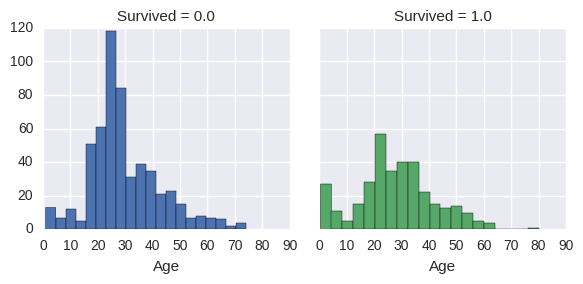

In [34]:
# 年齢
grid = sns.FacetGrid(df, col='Survived', hue='Survived')
grid.map(plt.hist, 'Age', bins=20)
plt.show()

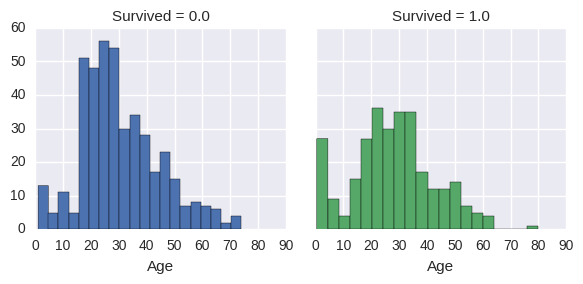

In [35]:
# 参考）元の年齢の分布
df_age = df_org.dropna(subset=['Age'])
grid = sns.FacetGrid(df_age, col='Survived', hue='Survived')
grid.map(plt.hist, 'Age', bins=20)
plt.show()

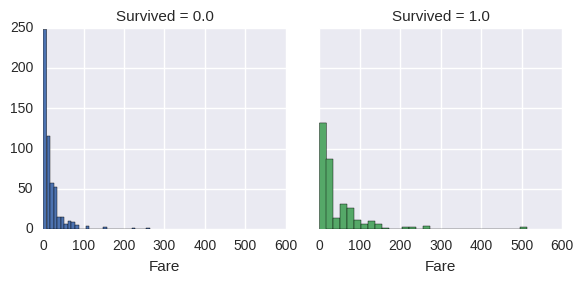

In [36]:
# 運賃
df_fare = df_org.dropna(subset=['Fare'])
grid = sns.FacetGrid(df_fare, col='Survived', hue='Survived')
grid.map(plt.hist, 'Fare', bins=30)
plt.show()

In [37]:
# 乗船した港
pd.pivot_table(df, index='Embarked', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

Survived,0.0,1.0
Embarked,,
C,75.0,93.0
Q,47.0,30.0
S,427.0,217.0
U,NaN,2.0


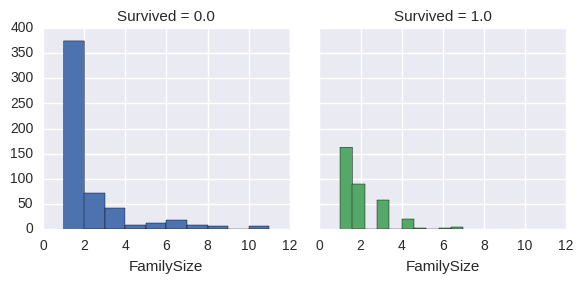

In [38]:
# 家族の数
grid = sns.FacetGrid(df, col='Survived', hue='Survived')
grid.map(plt.hist, 'FamilySize', bins=10)
plt.show()

In [39]:
# 家族サイズカテゴリ
#pd.pivot_table(df, index='FamilySizeCategory', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

In [40]:
# 肩書
pd.pivot_table(df, index='Title', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

Survived,0.0,1.0
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
rare_title,15,8


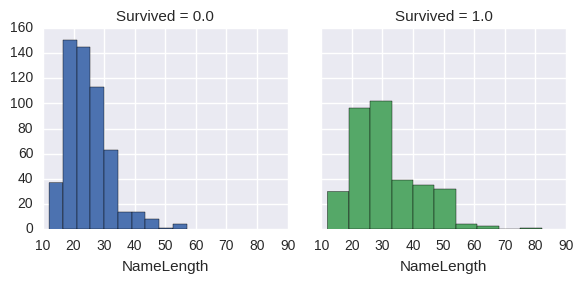

In [41]:
# 名前の長さ
grid = sns.FacetGrid(df, col='Survived', hue='Survived')
grid.map(plt.hist, 'NameLength', bins=10)
plt.show()

In [42]:
# 左舷、右舷
pd.pivot_table(df, index='RightLeft', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

Survived,0.0,1.0
RightLeft,,
left,259,164
right,290,178


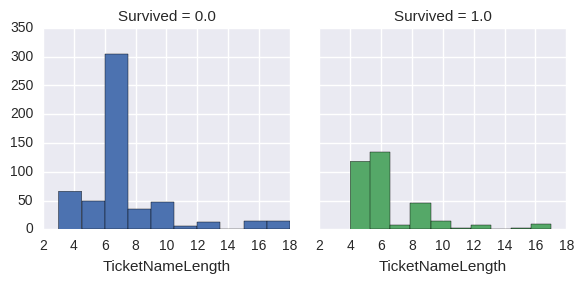

In [43]:
# チケットの名前の長さ
grid = sns.FacetGrid(df, col='Survived', hue='Survived')
grid.map(plt.hist, 'TicketNameLength', bins=10)
plt.show()

In [44]:
# チケット名の先頭の英字＋数字
pd.pivot_table(df, index='TicketPrefix', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

Survived,0.0,1.0
TicketPrefix,,
A5,19,2
CA,27,14
PC,21,39
StartWithNumber,407,254
other,75,33


In [45]:
# 部屋の位置
pd.pivot_table(df, index='Deck', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

Survived,0.0,1.0
Deck,,
B,12,35
C,24,35
D,8,25
E,8,24
U,481,206
other,16,17


In [46]:
# 年齢がnull
pd.pivot_table(df, index='AgeNull', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

Survived,0.0,1.0
AgeNull,,
0,424,290
1,125,52


In [47]:
# 母
pd.pivot_table(df, index='Mother', columns='Survived', values='PassengerId', aggfunc=lambda x: len(x))

Survived,0.0,1.0
Mother,,
0,533,302
1,16,40


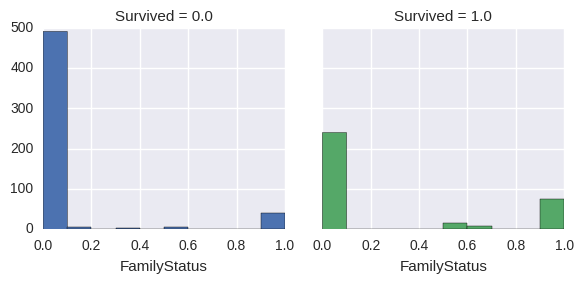

In [48]:
# 家族の生存状況
grid = sns.FacetGrid(df, col='Survived', hue='Survived')
grid.map(plt.hist, 'FamilyStatus', bins=10)
plt.show()

#### 文字列カテゴリデータを数値に変換

In [49]:
def create_new_colnames(category, classes):
    colnames = []
    for class_ in classes:
        colnames.append(category + '_' + str(class_))
        
    return colnames

from sklearn.preprocessing import LabelEncoder
# クラス
le_pclass = LabelEncoder()
df.Pclass = le_pclass.fit_transform(df.Pclass)
print('pclass class labels: %s' % le_pclass.classes_)
pclass_colnames = create_new_colnames('Pclass', le_pclass.classes_)
    
# 性別
le_sex = LabelEncoder()
df.Sex = le_sex.fit_transform(df.Sex)
print('sex class labels: %s' % le_sex.classes_)
sex_colnames = create_new_colnames('Sex', le_sex.classes_)

# 乗船値
le_embarked = LabelEncoder()
df.Embarked = le_embarked.fit_transform(df.Embarked)
print('embarked class labels: %s' % le_embarked.classes_)
embarked_colnames = create_new_colnames('Embarked', le_embarked.classes_)

# 客室の階層
le_deck = LabelEncoder()
df.Deck = le_deck.fit_transform(df.Deck)
print('deck class labels: %s' % le_deck.classes_)
deck_colnames = create_new_colnames('Deck', le_deck.classes_)

# 肩書
le_title = LabelEncoder()
df.Title = le_title.fit_transform(df.Title)
print('title class labels: %s' % le_title.classes_)
title_colnames = create_new_colnames('Title', le_title.classes_)

# 右舷左舷
le_rightleft = LabelEncoder()
df.RightLeft = le_rightleft.fit_transform(df.RightLeft)
print('rightleft class labels: %s' % le_rightleft.classes_)
rightleft_colnames = create_new_colnames('RightLeft', le_rightleft.classes_)

# 家族サイズカテゴリ
#le_familysizecategory = LabelEncoder()
#df.FamilySizeCategory = le_familysizecategory.fit_transform(df.FamilySizeCategory)
#print('familysizecategory class labels: %s' % le_familysizecategory.classes_)
#familysizecategory_colnames = create_new_colnames('FamilySizeCategory', le_familysizecategory.classes_)

# チケットの頭文字
le_ticketprefix = LabelEncoder()
df.TicketPrefix = le_ticketprefix.fit_transform(df.TicketPrefix)
print('ticketprefix class labels: %s' % le_ticketprefix.classes_)
ticketprefix_colnames = create_new_colnames('TicketPrefix', le_ticketprefix.classes_)

pclass class labels: [1 2 3]
sex class labels: ['female' 'male']
embarked class labels: ['C' 'Q' 'S' 'U']
deck class labels: ['B' 'C' 'D' 'E' 'U' 'other']
title class labels: ['Master' 'Miss' 'Mr' 'Mrs' 'rare_title']
rightleft class labels: ['left' 'right']
ticketprefix class labels: ['A5' 'CA' 'PC' 'StartWithNumber' 'other']


In [50]:
# 乗客IDと生存フラグを除く
df_features = df.iloc[:, 2:]
df_features.head(2)

,Age,Fare,Parch,SibSp,FamilySize,NameLength,TicketNameLength,AgeNull,FamilyStatus,Mother,RightLeft,Title,Embarked,Pclass,Sex,Deck,TicketPrefix
0,22.0,7.2500,0,1,2,23,9,0,0.0,0,1,2,2,2,1,4,0
1,38.0,71.2833,0,1,2,51,8,0,0.0,0,1,3,0,0,0,1,2


#### カテゴリデータをone-hotエンコーディング

In [51]:
# 特徴データをone-hotエンコーディング
from sklearn.preprocessing import OneHotEncoder
# エンコーダーインスタンスの生成
ohe = OneHotEncoder(categorical_features=[10, 11, 12, 13, 14, 15, 16])
# エンコーディングの実行
features = ohe.fit_transform(df_features).toarray()

columns = []
columns.extend(rightleft_colnames)
columns.extend(title_colnames)
columns.extend(embarked_colnames)
columns.extend(pclass_colnames)
columns.extend(sex_colnames)
columns.extend(deck_colnames)
#columns.extend(familysizecategory_colnames)
columns.extend(ticketprefix_colnames)
columns.extend(['Age', 'Fare', 'Parch', 'SibSp', 'FamilySize', 'NameLength', 'TicketNameLength', 'AgeNull', 'FamilyStatus', 'Mother'])

ohe.feature_indices_

array([ 0,  2,  7, 11, 14, 16, 22, 27])

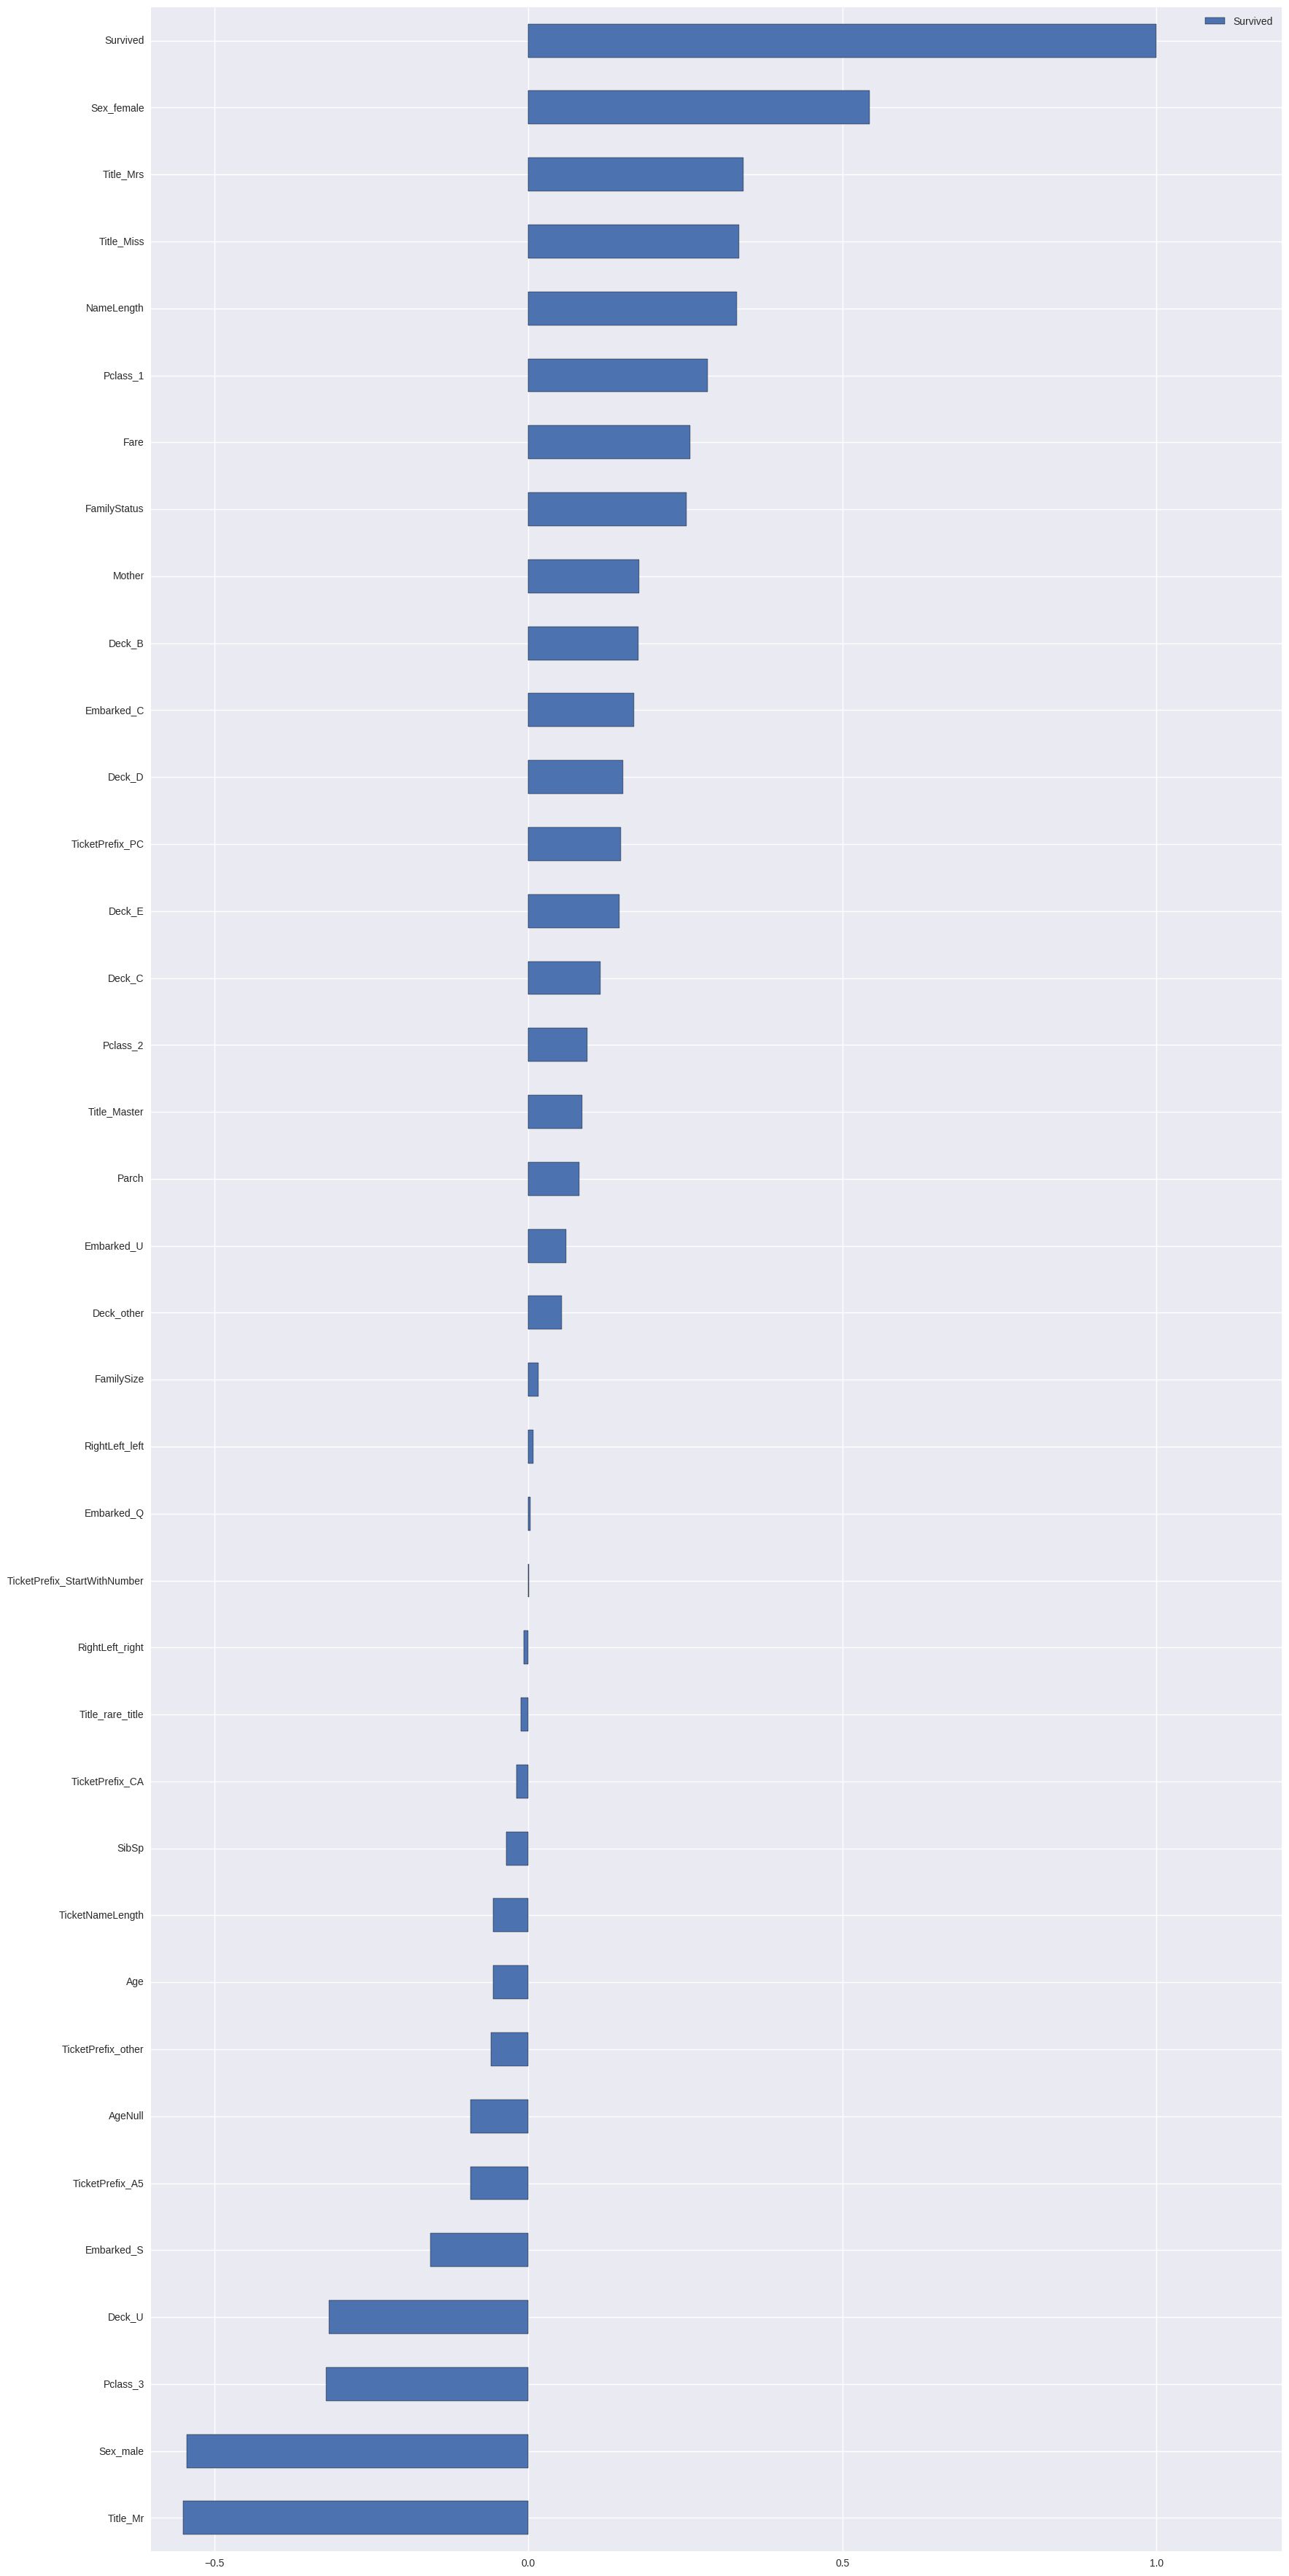

In [52]:
# 生存フラグとの相関を表示
import numpy as np
columns_full = ['Survived']
columns_full.extend(columns)
df_converted = pd.DataFrame(np.hstack((df.Survived.values[:, np.newaxis], features)), columns=columns_full)
df_covariance = pd.DataFrame(df_converted.corr()['Survived'].sort_values(ascending=True))
df_covariance.plot(kind='barh', figsize=(20, 45))
plt.show()

In [53]:
# データをモデル作成用と予測用に分割
X = features[0:891, :]
X_test = features[891:, :]
y = df.iloc[0:891, 1].values
X.shape

(891, 37)

#### 特徴選択

In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

forest_for_feature_selection = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, criterion='entropy')
forest_for_feature_selection.fit(X=X, y=y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

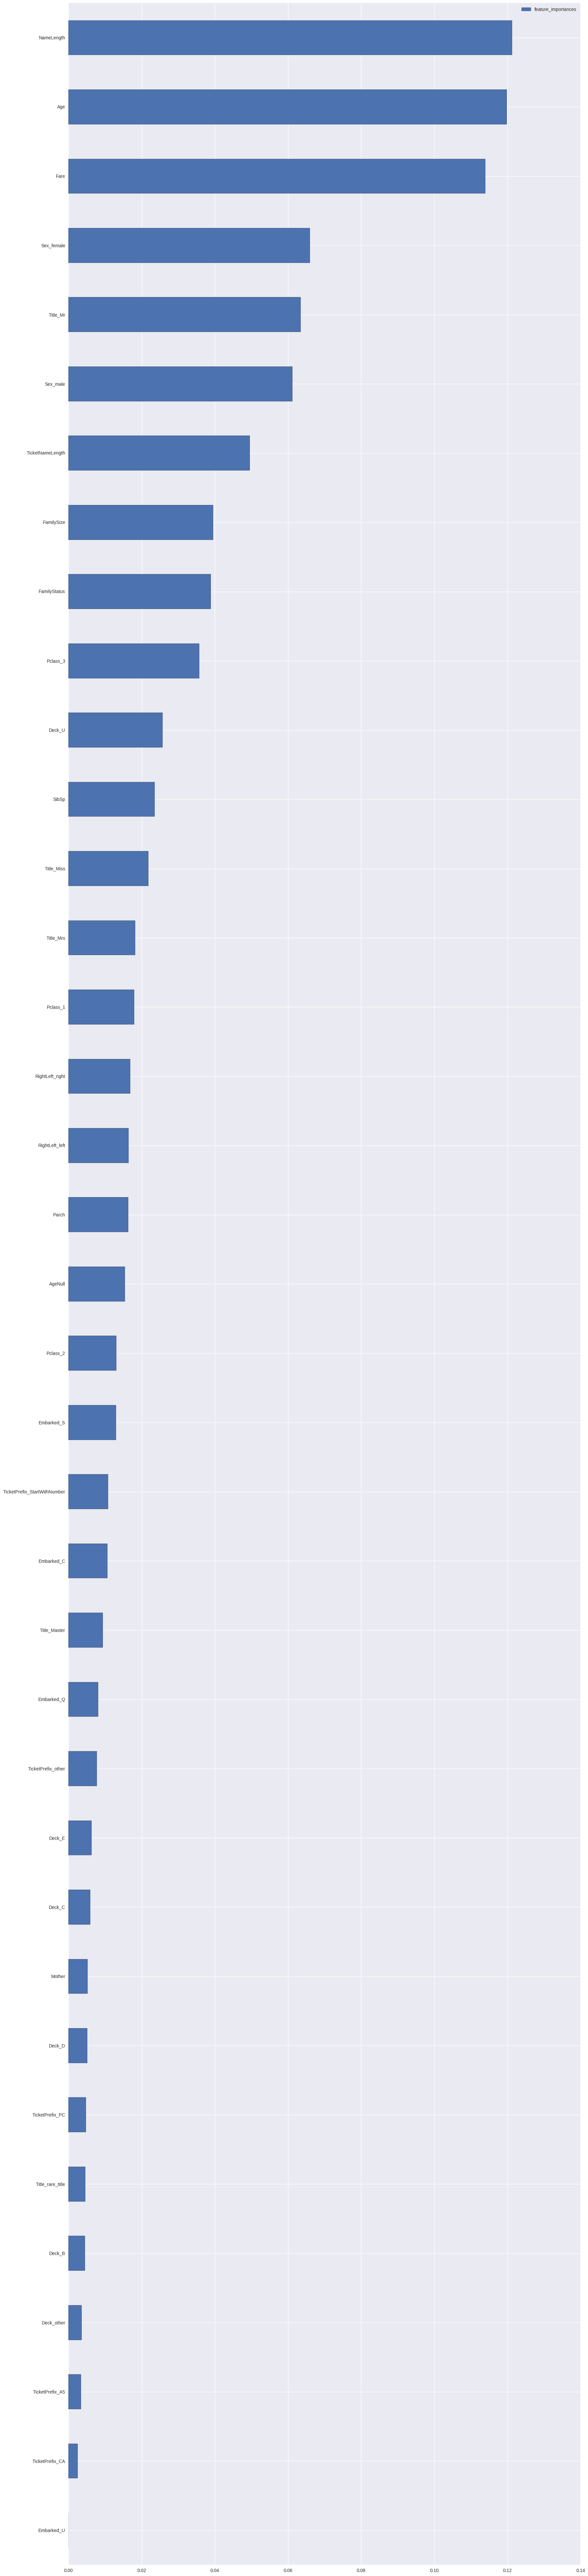

In [55]:
df_feature_importances = pd.DataFrame(forest_for_feature_selection.feature_importances_, columns=['feature_importances'], index=columns)
df_feature_importances.sort_values(by='feature_importances', ascending=True, inplace=True)
df_feature_importances.plot(kind='barh', figsize=(20, 100))
plt.show()

In [56]:
# トレーニングデータとテストデータを分割
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [57]:
# cross validationを行う関数
from sklearn.cross_validation import StratifiedKFold

def cross_validation(X, y, estimator, n_folds=10, random_state=1):
    kfold = StratifiedKFold(y=y, n_folds=n_folds, random_state=random_state)
    scores = []
    
    for k, (train, test) in enumerate(kfold):
        estimator.fit(X[train], y[train])
        score = estimator.score(X[test], y[test])
        scores.append(score)
        print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k + 1, np.bincount(y[train].astype(int)), score))
    
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
# パラメータ毎のバイアス-バリアンスの関係性グラフを描画する関数
from sklearn.learning_curve import validation_curve
from sklearn.model_selection import KFold

def bias_variance_graph(estimator, X, y, param_name, param_range, cv=10):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv
    )
    
    # スコアの平均と標準偏差を計算
    train_mean = np.mean(train_scores, axis=1) # axis=1 列の平均
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # トレーニグデータのグラフを描画
    plt.plot(param_range, train_mean, color='b', marker='o', markersize=5, label='training accuracy')
    # +-標準偏差分を薄く表示してブレ幅を表現
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='b') # alphaは透明度
    # テストデータも同様に表示
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='validation accuracy')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    
    plt.grid()
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [59]:
# ランダムフォレスト用のインスタンスを作成
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0, n_jobs=-1)

pipe_rf = Pipeline([
        ('sfm', SelectFromModel(RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, criterion='gini'), threshold=0)),
        ('clf', forest)
    ])

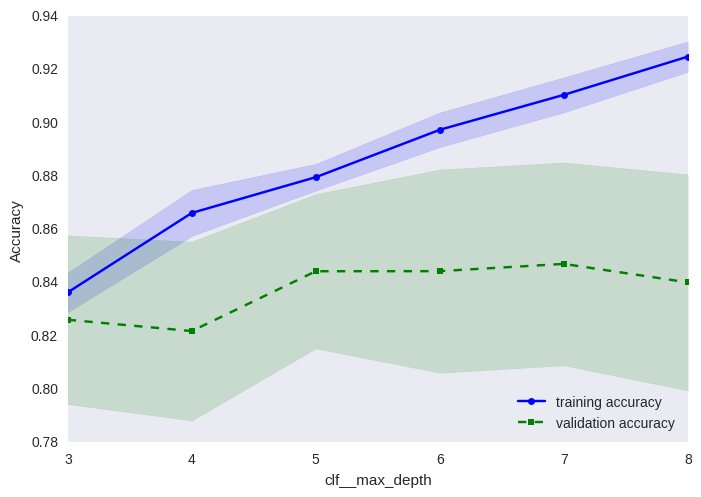

In [60]:
# 木の最大の深さ
bias_variance_graph(estimator=pipe_rf, X=X_train, y=y_train, param_range=[3, 4, 5, 6, 7, 8], param_name='clf__max_depth')

5くらいがよさそう

In [61]:
pipe_rf.set_params(**{'clf__max_depth': 5})

Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_le...stimators=10, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])

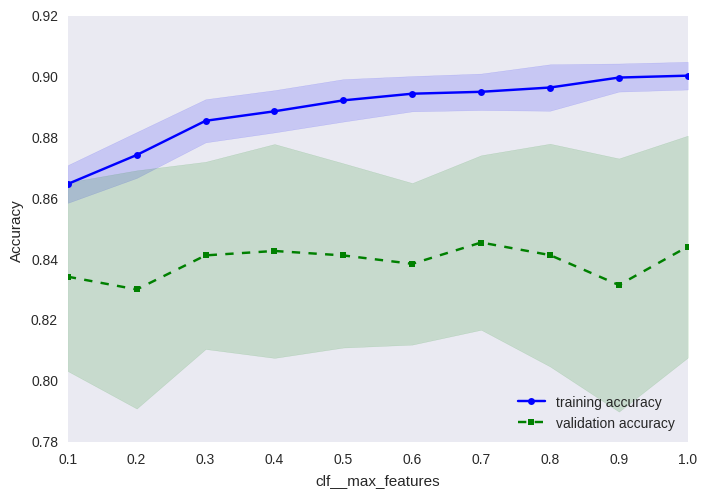

In [62]:
# 1つの木で利用するサンプル数
bias_variance_graph(estimator=pipe_rf, X=X_train, y=y_train, param_range=np.linspace(0.1, 1.0, 10), param_name='clf__max_features')

0.3か0.7？

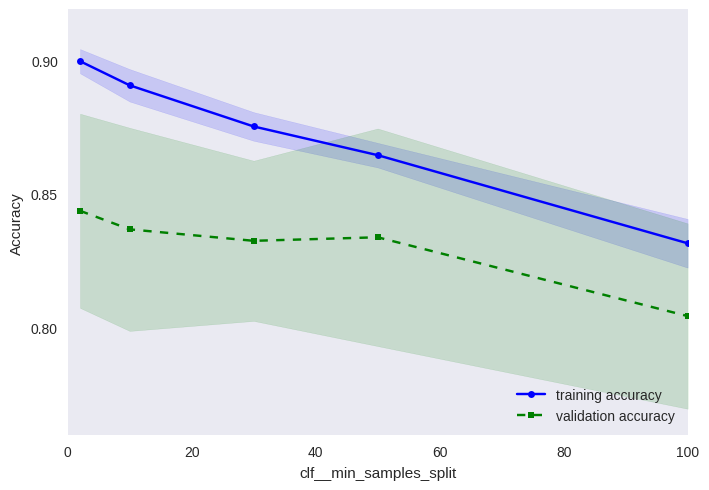

In [64]:
# 分割する最小値
bias_variance_graph(
    estimator=pipe_rf,
    X=X_train, y=y_train,
    param_range=[2, 10, 30, 50, 100],
    param_name='clf__min_samples_split'
)

デフォルトが最良に見える

In [74]:
pipe_rf.set_params(**{'clf__min_samples_split': 10})

Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_le...timators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])

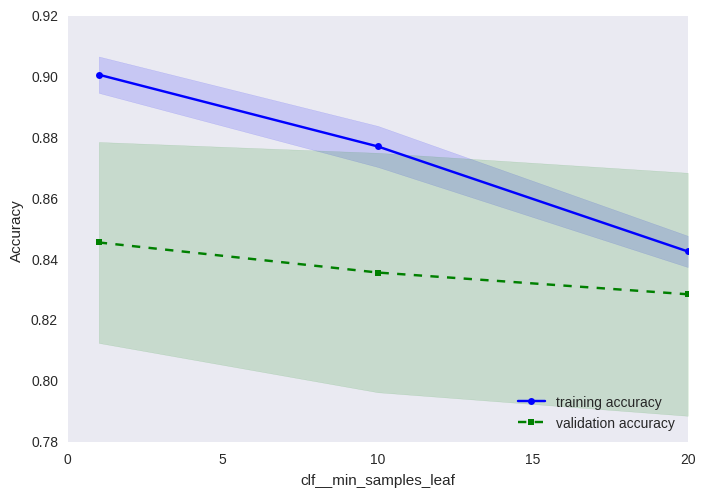

In [75]:
# 葉の最小サンプル数
bias_variance_graph(estimator=pipe_rf, X=X_train, y=y_train, param_range=[1, 10, 20], param_name='clf__min_samples_leaf')

In [76]:
pipe_rf.set_params(**{'clf__min_samples_leaf': 1})

Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_le...timators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])

デフォルト値で問題なさそう

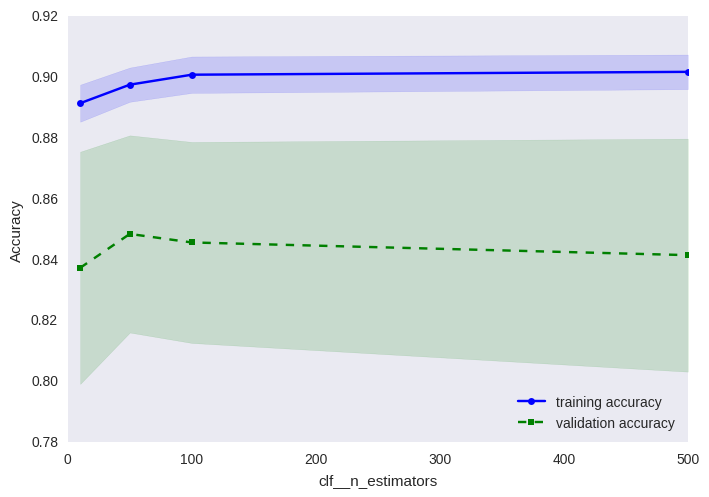

In [77]:
# 決定木の数
bias_variance_graph(estimator=pipe_rf, X=X_train, y=y_train, param_range=[10, 50, 100, 500], param_name='clf__n_estimators')

100以上にふやしてもほとんど効果がなさそう

In [78]:
pipe_rf.set_params(**{'clf__n_estimators': 100})

Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_le...timators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])

In [79]:
pipe_rf.set_params(**{'clf__n_estimators': 100, 'clf__max_depth': 5, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1})

Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_le...timators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])

In [67]:
#### グリッドサーチでパラメータ探索
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = [{
        'sfm__threshold': [0, 'mean'],
#        'pca__n_components': [5, 7, 10],
        'clf__min_samples_split': [2, 10, 15, 20, 25, 30],
#        'clf__criterion': ['gini', 'entropy'],
        'clf__max_features': [0.3, 'sqrt'],
#        'clf__max_leaf_nodes': [25, 50, 100]
        'clf__max_depth' : [4, 5, 6, None],
#        'clf__class_weight' : [None, 'balanced', 'balanced_subsample']
    }]

gs = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, scoring='f1', cv=10, n_jobs=-1, verbose=1)

In [68]:
gs.fit(X_train, y_train)
print('Best params: %s' % gs.best_params_)
print('Best score: %s' % gs.best_score_)
print('Scores:')
gs.grid_scores_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  6.1min finished


Best params: {'clf__max_features': 0.3, 'clf__max_depth': None, 'sfm__threshold': 0, 'clf__min_samples_split': 2}
Best score: 0.797891853999
Scores:


[mean: 0.76969, std: 0.05237, params: {'clf__max_features': 0.3, 'clf__max_depth': 4, 'sfm__threshold': 0, 'clf__min_samples_split': 2},
 mean: 0.76220, std: 0.05083, params: {'clf__max_features': 0.3, 'clf__max_depth': 4, 'sfm__threshold': 'mean', 'clf__min_samples_split': 2},
 mean: 0.77523, std: 0.05158, params: {'clf__max_features': 0.3, 'clf__max_depth': 4, 'sfm__threshold': 0, 'clf__min_samples_split': 10},
 mean: 0.77028, std: 0.05535, params: {'clf__max_features': 0.3, 'clf__max_depth': 4, 'sfm__threshold': 'mean', 'clf__min_samples_split': 10},
 mean: 0.77508, std: 0.04869, params: {'clf__max_features': 0.3, 'clf__max_depth': 4, 'sfm__threshold': 0, 'clf__min_samples_split': 15},
 mean: 0.76528, std: 0.04924, params: {'clf__max_features': 0.3, 'clf__max_depth': 4, 'sfm__threshold': 'mean', 'clf__min_samples_split': 15},
 mean: 0.77334, std: 0.05312, params: {'clf__max_features': 0.3, 'clf__max_depth': 4, 'sfm__threshold': 0, 'clf__min_samples_split': 20},
 mean: 0.74739, std: 

In [90]:
pipe_rf.get_params()

{'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=5, max_features=0.3, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
             verbose=0, warm_start=False),
 'clf__bootstrap': True,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': 5,
 'clf__max_features': 0.3,
 'clf__max_leaf_nodes': None,
 'clf__min_impurity_split': 1e-07,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 10,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 100,
 'clf__n_jobs': -1,
 'clf__oob_score': False,
 'clf__random_state': 0,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'sfm': SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_no

In [64]:
pipe_rf.set_params(**gs.best_params_)
#pipe_rf.set_params(**{'clf__max_features': 0.3, 'sfm__threshold': 0, 'clf__min_samples_split': 2})

Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_le...stimators=10, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])

In [65]:
pipe_rf.fit(X=X_train, y=y_train)

Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_le...stimators=10, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])

In [66]:
# テストデータで評価
print('Valid score: %.20f' % accuracy_score(y_pred=pipe_rf.predict(X_valid), y_true=y_valid))

Valid score: 0.77094972067039102548


In [114]:
cross_validation(X=X_train, y=y_train, estimator=pipe_rf)

Fold: 1, Class dist.: [398 242], Acc: 0.792
Fold: 2, Class dist.: [398 242], Acc: 0.792
Fold: 3, Class dist.: [398 242], Acc: 0.764
Fold: 4, Class dist.: [399 242], Acc: 0.873
Fold: 5, Class dist.: [399 242], Acc: 0.873
Fold: 6, Class dist.: [399 242], Acc: 0.873
Fold: 7, Class dist.: [399 242], Acc: 0.901
Fold: 8, Class dist.: [399 242], Acc: 0.873
Fold: 9, Class dist.: [399 242], Acc: 0.887
Fold: 10, Class dist.: [399 243], Acc: 0.800
CV accuracy: 0.843 +/- 0.047


In [115]:
pipe_rf.fit(X, y)

Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_le...timators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])

In [116]:
# 結果を保存
submission = pd.DataFrame({
        'PassengerId': df.iloc[891:, 0],
        'Survived': pipe_rf.predict(X_test).astype(int)
    })
submission.to_csv('result/predict_rf.csv', index=False)

#### SVM

In [96]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# インスタンス生成
pipe_svm = Pipeline([
#        ('sfm', SelectFromModel(RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, criterion='entropy'))),
        ('stdsclr', StandardScaler()),
#        ('pca', PCA()),
        ('clf', SVC(kernel='rbf'))
])

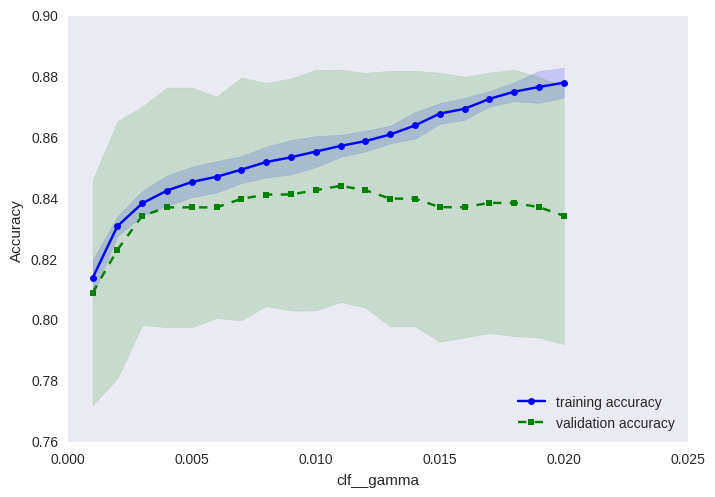

In [101]:
# カーネルパラメータ（距離）
bias_variance_graph(estimator=pipe_svm, X=X_train, y=y_train, param_range=np.linspace(0.001, 0.02, 20), param_name='clf__gamma')

gammaは0.004くらい？

In [103]:
pipe_svm.set_params(**{'clf__gamma': 0.004})

Pipeline(steps=[('stdsclr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=-1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.004, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

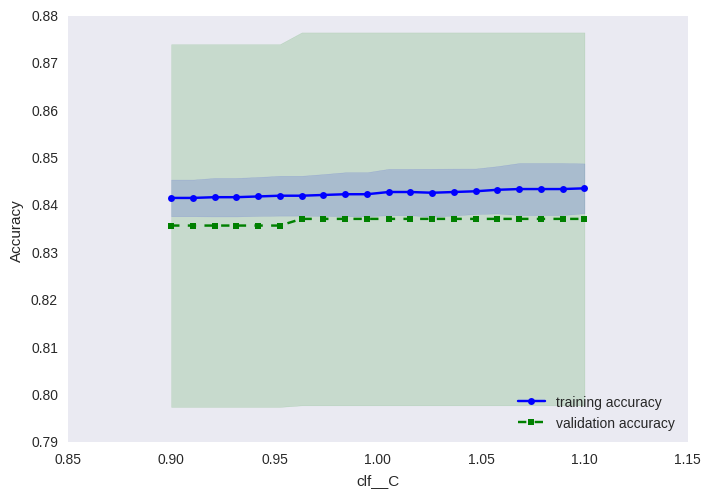

In [110]:
# C
bias_variance_graph(estimator=pipe_svm, X=X_train, y=y_train, param_range=np.linspace(0.9, 1.1, 20), param_name='clf__C')

1が最適か

In [111]:
pipe_svm.set_params(**{'clf__C': 1})

Pipeline(steps=[('stdsclr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.004, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [101]:
# グリッドサーチ
param_grid = [{
#        'pca__n_components': range(10, 40, 10),
#        'clf__C': np.arange(0.1, 1.3, 0.1),
        'clf__C': [1000, 2000, 2500, 2700],
        'clf__gamma': [0.0007, 0.0008, 0.0009, 0.0010, 0.0011]
}]
gs = GridSearchCV(estimator=pipe_svm, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

In [102]:
gs.fit(X_train, y_train)
print('Best params: %s' % gs.best_params_)
print('Best score: %s' % gs.best_score_)
print('Scores:')
gs.grid_scores_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.1s


Best params: {'clf__gamma': 0.0008, 'clf__C': 2700}
Best score: 0.839887640449
Scores:


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.7s finished


[mean: 0.83287, std: 0.03985, params: {'clf__gamma': 0.0007, 'clf__C': 1000},
 mean: 0.83006, std: 0.04076, params: {'clf__gamma': 0.0008, 'clf__C': 1000},
 mean: 0.83427, std: 0.03943, params: {'clf__gamma': 0.0009, 'clf__C': 1000},
 mean: 0.83848, std: 0.03981, params: {'clf__gamma': 0.001, 'clf__C': 1000},
 mean: 0.83848, std: 0.03821, params: {'clf__gamma': 0.0011, 'clf__C': 1000},
 mean: 0.83708, std: 0.03880, params: {'clf__gamma': 0.0007, 'clf__C': 2000},
 mean: 0.83848, std: 0.03821, params: {'clf__gamma': 0.0008, 'clf__C': 2000},
 mean: 0.83848, std: 0.03776, params: {'clf__gamma': 0.0009, 'clf__C': 2000},
 mean: 0.83708, std: 0.03785, params: {'clf__gamma': 0.001, 'clf__C': 2000},
 mean: 0.83146, std: 0.03877, params: {'clf__gamma': 0.0011, 'clf__C': 2000},
 mean: 0.83708, std: 0.04010, params: {'clf__gamma': 0.0007, 'clf__C': 2500},
 mean: 0.83848, std: 0.03776, params: {'clf__gamma': 0.0008, 'clf__C': 2500},
 mean: 0.83567, std: 0.03673, params: {'clf__gamma': 0.0009, 'clf_

In [103]:
#Best params: {'clf__gamma': 0.0001, 'pca__n_components': 60, 'clf__C': 10000.0}
#pipe_svm.set_params(**gs.best_params_)
pipe_svm.set_params(**{'clf__gamma': 0.0008, 'clf__C': 2500})

Pipeline(steps=[('stdsclr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=2500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0008, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [112]:
pipe_svm.fit(X=X_train, y=y_train)
print('Valid score: %.20f' % accuracy_score(y_pred=pipe_svm.predict(X_valid), y_true=y_valid))

Valid score: 0.81564245810055868713


In [113]:
cross_validation(estimator=pipe_svm, X=X_train, y=y_train)

Fold: 1, Class dist.: [398 242], Acc: 0.778
Fold: 2, Class dist.: [398 242], Acc: 0.792
Fold: 3, Class dist.: [398 242], Acc: 0.819
Fold: 4, Class dist.: [399 242], Acc: 0.859
Fold: 5, Class dist.: [399 242], Acc: 0.831
Fold: 6, Class dist.: [399 242], Acc: 0.873
Fold: 7, Class dist.: [399 242], Acc: 0.873
Fold: 8, Class dist.: [399 242], Acc: 0.887
Fold: 9, Class dist.: [399 242], Acc: 0.873
Fold: 10, Class dist.: [399 243], Acc: 0.786
CV accuracy: 0.837 +/- 0.039


In [114]:
pipe_svm.fit(X, y)

Pipeline(steps=[('stdsclr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.004, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [107]:
# 結果を保存
submission = pd.DataFrame({
        'PassengerId': df.iloc[891:, 0],
        'Survived': pipe_svm.predict(X_test).astype(int)
    })
submission.to_csv('result/prediction_svm.csv', index=False)

In [63]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0),
    n_estimators=100,
    random_state=0
)

pipe_ada = Pipeline([
#        ('sfm', SelectFromModel(RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100))),
        ('clf', ada)
])

In [66]:
pipe_ada.fit(X_train, y_train)
print('Valid score: %.20f' % accuracy_score(y_pred=pipe_ada.predict(X_valid), y_true=y_valid))

Valid score: 0.79888268156424580013


In [68]:
cross_validation(estimator=pipe_ada, X=X_train, y=y_train)

Fold: 1, Class dist.: [398 242], Acc: 0.819
Fold: 2, Class dist.: [398 242], Acc: 0.750
Fold: 3, Class dist.: [398 242], Acc: 0.792
Fold: 4, Class dist.: [399 242], Acc: 0.873
Fold: 5, Class dist.: [399 242], Acc: 0.873
Fold: 6, Class dist.: [399 242], Acc: 0.845
Fold: 7, Class dist.: [399 242], Acc: 0.845
Fold: 8, Class dist.: [399 242], Acc: 0.761
Fold: 9, Class dist.: [399 242], Acc: 0.845
Fold: 10, Class dist.: [399 243], Acc: 0.800
CV accuracy: 0.820 +/- 0.041


In [69]:
pipe_ada.fit(X, y)

Pipeline(steps=[('clf', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=0))])

In [70]:
# 結果を保存
submission = pd.DataFrame({
        'PassengerId': df.iloc[891:, 0],
        'Survived': pipe_ada.predict(X_test).astype(int)
    })
submission.to_csv('result/prediction_ada.csv', index=False)

In [72]:
# 回帰系アルゴリズム
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

pipe_lr = Pipeline([
        ('stdsclr', StandardScaler()),
        ('clf', ada)
])

In [75]:
pipe_lr.fit(X_train, y_train)
print('Valid score: %.20f' % accuracy_score(y_pred=pipe_lr.predict(X_valid), y_true=y_valid))

Valid score: 0.79888268156424580013


In [76]:
cross_validation(estimator=pipe_lr, X=X_train, y=y_train)

Fold: 1, Class dist.: [398 242], Acc: 0.819
Fold: 2, Class dist.: [398 242], Acc: 0.750
Fold: 3, Class dist.: [398 242], Acc: 0.792
Fold: 4, Class dist.: [399 242], Acc: 0.873
Fold: 5, Class dist.: [399 242], Acc: 0.873
Fold: 6, Class dist.: [399 242], Acc: 0.845
Fold: 7, Class dist.: [399 242], Acc: 0.845
Fold: 8, Class dist.: [399 242], Acc: 0.761
Fold: 9, Class dist.: [399 242], Acc: 0.845
Fold: 10, Class dist.: [399 243], Acc: 0.800
CV accuracy: 0.820 +/- 0.041


In [77]:
pipe_lr.fit(X, y)

Pipeline(steps=[('stdsclr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impur..., random_state=0, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=0))])

In [78]:
# 結果を保存
submission = pd.DataFrame({
        'PassengerId': df.iloc[891:, 0],
        'Survived': pipe_ada.predict(X_test).astype(int)
    })
submission.to_csv('result/prediction_lr.csv', index=False)

In [85]:
# アンサンブル
from sklearn.ensemble import VotingClassifier

# 学習器
estimators = [('rf', pipe_rf), ('svm', pipe_svm), ('ada', pipe_ada), ('lr', pipe_lr)]
vc = VotingClassifier(estimators=estimators, n_jobs=-1)

In [87]:
vc.fit(X_train, y_train)
print('Valid score: %.20f' % accuracy_score(y_pred=vc.predict(X_valid), y_true=y_valid))

Valid score: 0.83798882681564246244


In [88]:
cross_validation(estimator=vc, X=X_train, y=y_train)

Fold: 1, Class dist.: [398 242], Acc: 0.806
Fold: 2, Class dist.: [398 242], Acc: 0.764
Fold: 3, Class dist.: [398 242], Acc: 0.778
Fold: 4, Class dist.: [399 242], Acc: 0.873
Fold: 5, Class dist.: [399 242], Acc: 0.901
Fold: 6, Class dist.: [399 242], Acc: 0.859
Fold: 7, Class dist.: [399 242], Acc: 0.873
Fold: 8, Class dist.: [399 242], Acc: 0.831
Fold: 9, Class dist.: [399 242], Acc: 0.859
Fold: 10, Class dist.: [399 243], Acc: 0.814
CV accuracy: 0.836 +/- 0.043


In [89]:
vc.fit(X, y)

VotingClassifier(estimators=[('rf', Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_spl...andom_state=0, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=0))]))],
         n_jobs=-1, voting='hard', weights=None)

In [90]:
# 結果を保存
submission = pd.DataFrame({
        'PassengerId': df.iloc[891:, 0],
        'Survived': pipe_ada.predict(X_test).astype(int)
    })
submission.to_csv('result/prediction_vc.csv', index=False)

validationの正解率が下がらない範囲で、トレーニングデータの正解率との差がなくなるよう調整する→overfittingを防ぐ<Br>
http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html<br>
SVM Cを小さくすると過学習を抑えられる<br>
https://stackoverflow.com/questions/35376293/extracting-selected-feature-names-from-scikit-pipeline<br>
http://www.mirandora.com/?p=1804<br>
https://funmatu.wordpress.com/2017/04/20/%E4%B8%80%E6%97%A5%E4%B8%80python%EF%BC%9Akaggle%E3%81%AE%E3%83%81%E3%83%A5%E3%83%BC%E3%83%88%E3%83%AA%E3%82%A2%E3%83%AB%EF%BC%88%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E3%83%87/<br>
http://qiita.com/keigohtr/items/b56df626f60b03fc0ebf<br>
classification_report<br>
データが偏ってる時のサンプリング？<br>